In [1]:
%matplotlib inline
from datavyz import ge

# Calibration of AMPA-to-NMDA ratio

In [2]:
cd ..

C:\Users\yann.zerlaut\work\zinc-NMDA-modulation


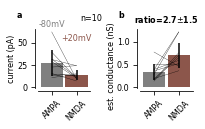

In [3]:
import numpy as np
from datavyz import ge
from data.exp_datasets import SYN_CONDUCTANCE_MEASUREMENTS
fig, AX = ge.figure(axes=(2,1), figsize=(.9,1.3), wspace=1.5, top=1.2)
for v1, v2 in zip(SYN_CONDUCTANCE_MEASUREMENTS['ampa'], SYN_CONDUCTANCE_MEASUREMENTS['nmda']):
    AX[0].plot([0,1], [v1, v2], 'k-', lw=0.3)
    AX[1].plot([0,1], [v1/80, v2/20], 'k-', lw=0.3)
ge.bar(np.array([np.mean(SYN_CONDUCTANCE_MEASUREMENTS['ampa']),
                 np.mean(SYN_CONDUCTANCE_MEASUREMENTS['nmda'])]),
       sy=np.array([np.std(SYN_CONDUCTANCE_MEASUREMENTS['ampa']),
                    np.std(SYN_CONDUCTANCE_MEASUREMENTS['nmda'])]),
       COLORS=[ge.grey, ge.brown],
       ax=AX[0],
       axes_args=dict(ylabel='current (pA)', xticks=[0, 1], xticks_labels=['AMPA', 'NMDA'], xticks_rotation=45))
for i, v, val in zip(range(2), ['-80', '+20'], [65, 50]):
    ge.annotate(AX[0],'%smV'%v,(i,val),xycoords='data', ha='center', color=[ge.grey, ge.brown][i])

ge.bar(np.array([np.mean(SYN_CONDUCTANCE_MEASUREMENTS['ampa'])/80.,
                 np.mean(SYN_CONDUCTANCE_MEASUREMENTS['nmda'])/20.]),
       sy=np.array([np.std(SYN_CONDUCTANCE_MEASUREMENTS['ampa'])/80.,
                    np.std(SYN_CONDUCTANCE_MEASUREMENTS['nmda'])/20.]),
       COLORS=[ge.grey, ge.brown],
       ax=AX[1],
       axes_args=dict(ylabel='est. conductance (nS)      ', xticks=[0, 1], xticks_labels=['AMPA', 'NMDA'], xticks_rotation=45))

RATIOS = np.array(SYN_CONDUCTANCE_MEASUREMENTS['nmda'])/np.array(SYN_CONDUCTANCE_MEASUREMENTS['ampa'])*80/20
ge.annotate(AX[0], 'n=%i' % len(RATIOS), (.8,1.11))
ge.title(AX[1], 'ratio=%.1f$\pm$%.1f' % (np.mean(RATIOS), np.std(RATIOS)), bold=True)
for l, ax in zip(['a', 'b'], AX):
    ge.top_left_letter(ax, l, loc=(-.3,1.15))
ge.savefig(fig, 'figures/ampa-nmda-ratio.png')       